### Membangun model sesuai dengan permasalahan

<p>Dikarenakan anggota kelompok 9 dan 10 sulit untuk dihubungi untuk mengerjakan tugas akhir kelompok, maka kami :</p>
<ul>
    <li>Dinni Rachmasari - Universitas Gadjah Mada</li>
    <li>Rifqi Alif Rahmandito - Universitas Gadjah Mada</li>
</ul>
<p>Memutuskan untuk membuat kelompok baru beranggotakan dua orang dan meneruskan project yang semula dikerjakan oleh kelompok 10</p>

### Permasalahan yang kami pilih adalah *classification*

### 1. Pre-processing data

In [34]:
# import library dan module untuk pre-processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
# import dataset
df = pd.read_csv('covtype.csv')

# membuang kolom jenis tanah dan area
df = df.drop(columns=df.iloc[:,10:-1])

# menampilkan 10 data pertama dari dataset
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5
5,2579,132,6,300,-15,67,230,237,140,6031,2
6,2606,45,7,270,5,633,222,225,138,6256,5
7,2605,49,4,234,7,573,222,230,144,6228,5
8,2617,45,9,240,56,666,223,221,133,6244,5
9,2612,59,10,247,11,636,228,219,124,6230,5


In [36]:
# menghitung jumlah data yang bernilai null
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
dtype: int64

In [37]:
# melihat jumlah baris dan kolom
df.shape

(581012, 11)

In [38]:
# memotong jumlah baris menjadi 120 baris
df.drop(df.index[121:-1], inplace=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5
...,...,...,...,...,...,...,...,...,...,...,...
117,2850,58,6,295,58,4394,225,227,137,5239,1
118,2586,76,4,190,30,1290,225,232,143,4875,2
119,2837,17,13,330,45,4241,208,211,138,5428,1
120,2723,99,6,301,34,2109,230,232,136,5793,2


In [39]:
# memotong baris paling bawah
df.drop([581011], inplace=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5
...,...,...,...,...,...,...,...,...,...,...,...
116,2982,53,14,240,63,5756,227,209,112,3880,2
117,2850,58,6,295,58,4394,225,227,137,5239,1
118,2586,76,4,190,30,1290,225,232,143,4875,2
119,2837,17,13,330,45,4241,208,211,138,5428,1


<p>Maka didapatkan jumlah baris data yang akan digunakan yaitu 120 dari total 581010 baris data, sehingga jumlah data terbaru lebih kecil dan ringan untuk dijalankan</p>

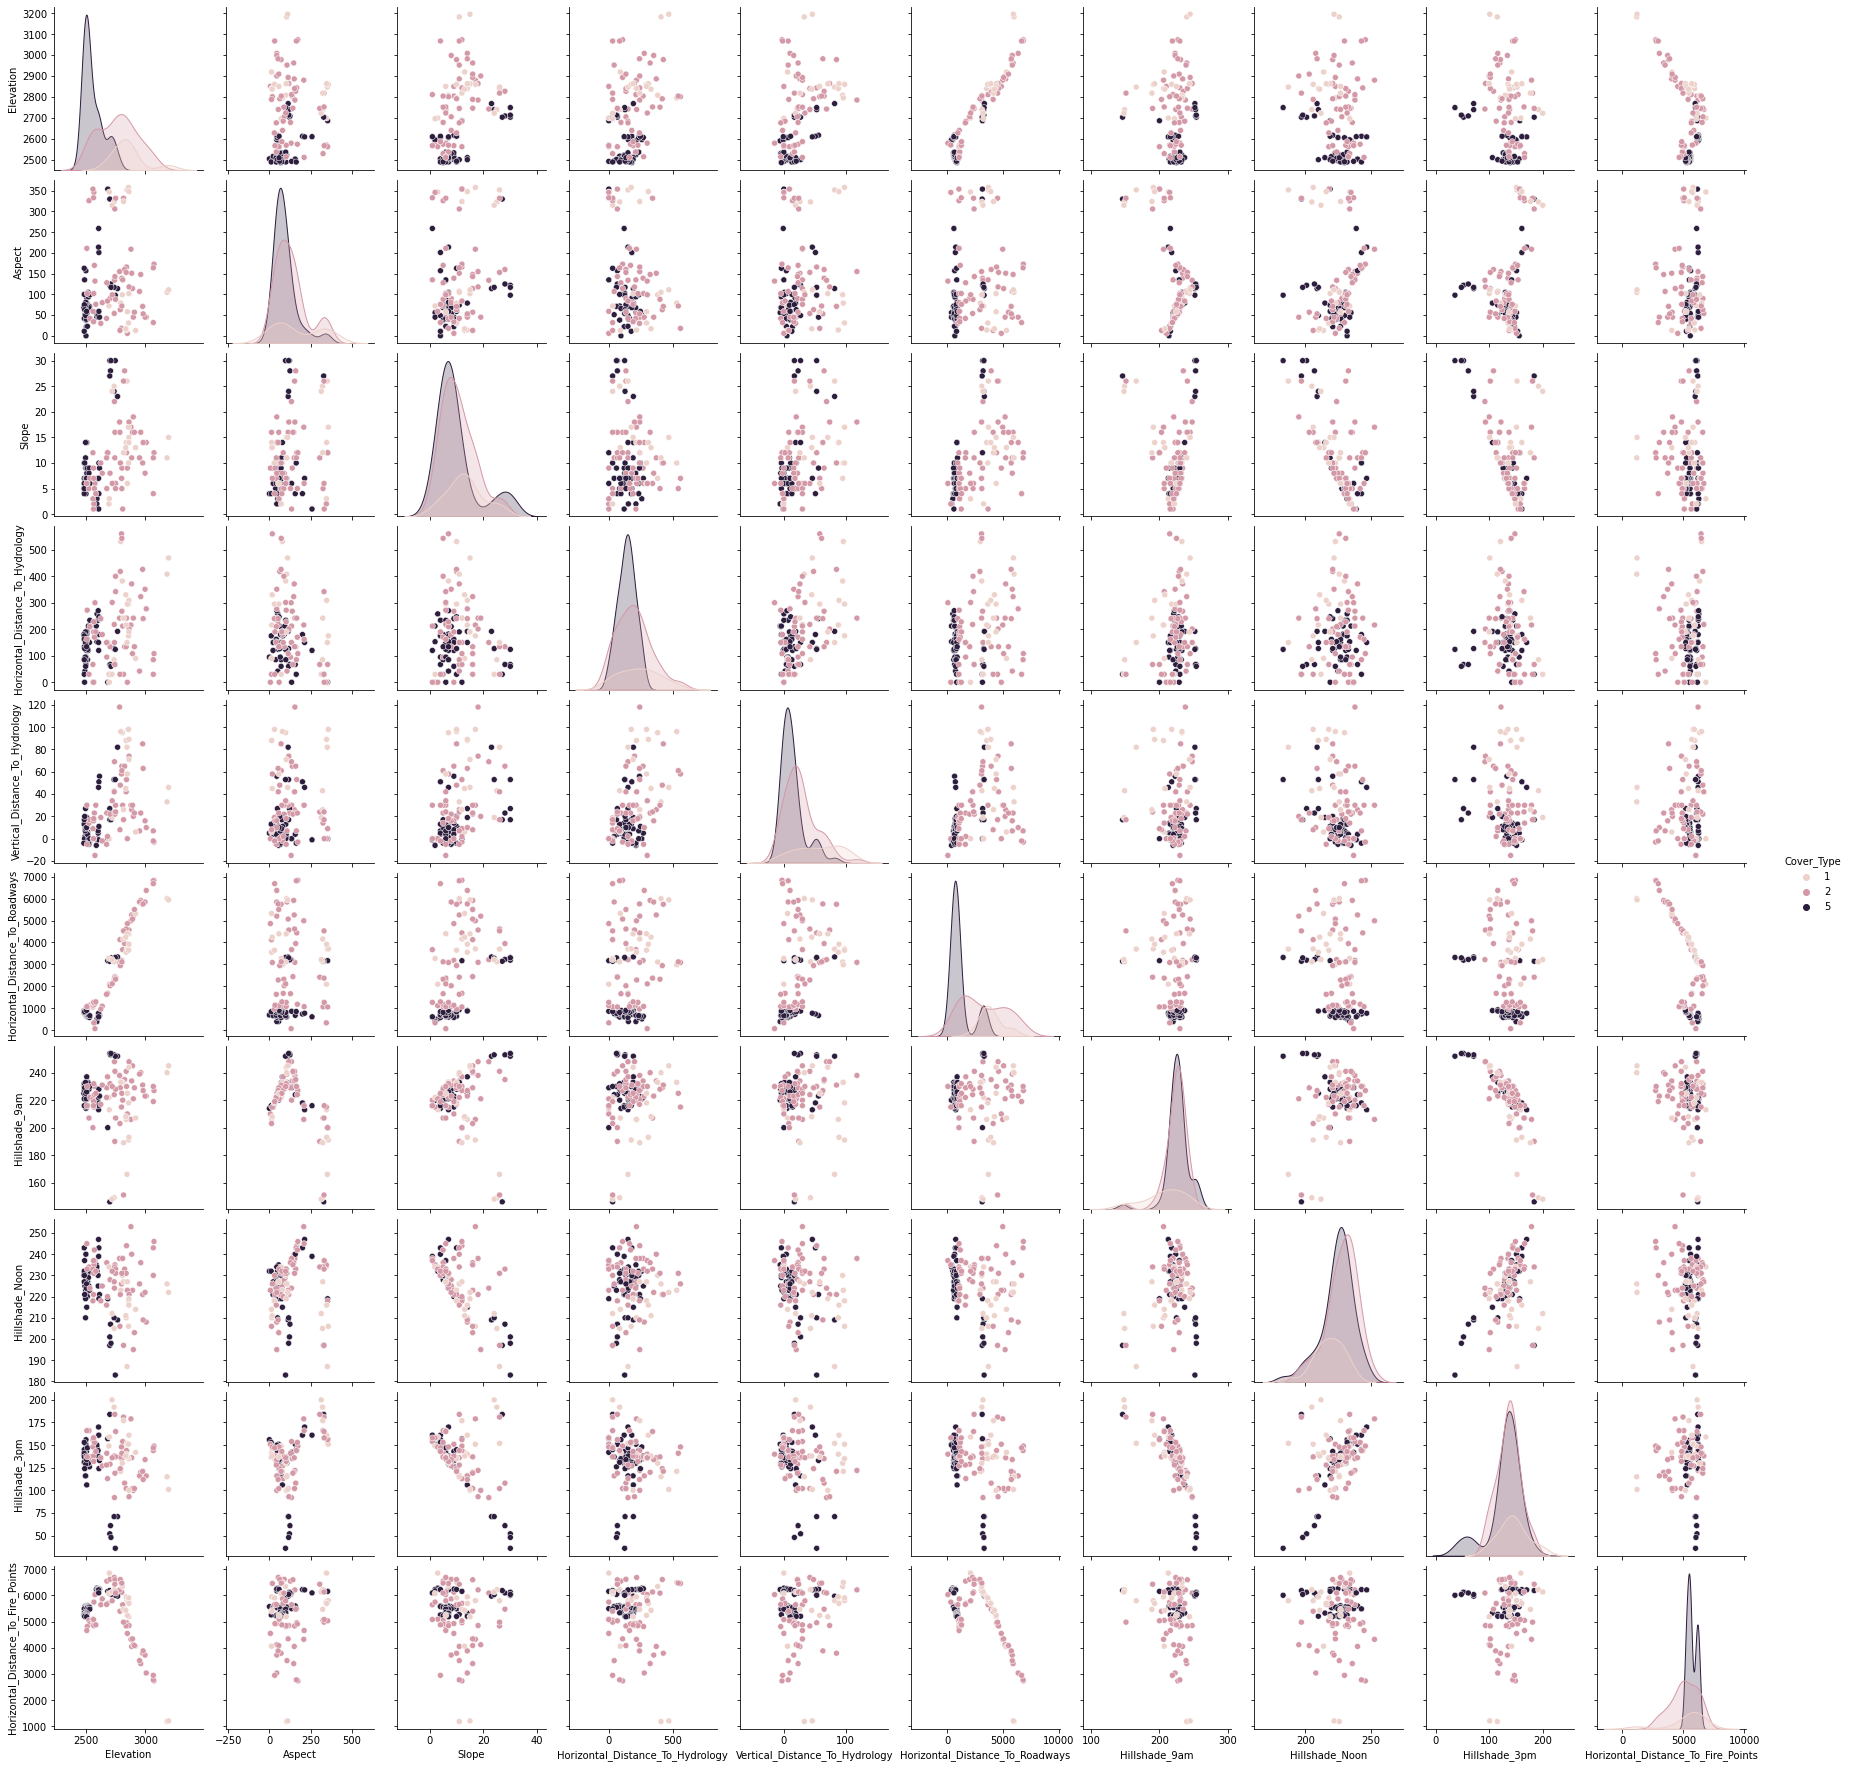

In [42]:
# dilakukan visualisasi menggunakan pairplot
sns.pairplot(data=df, hue='Cover_Type')
plt.show()

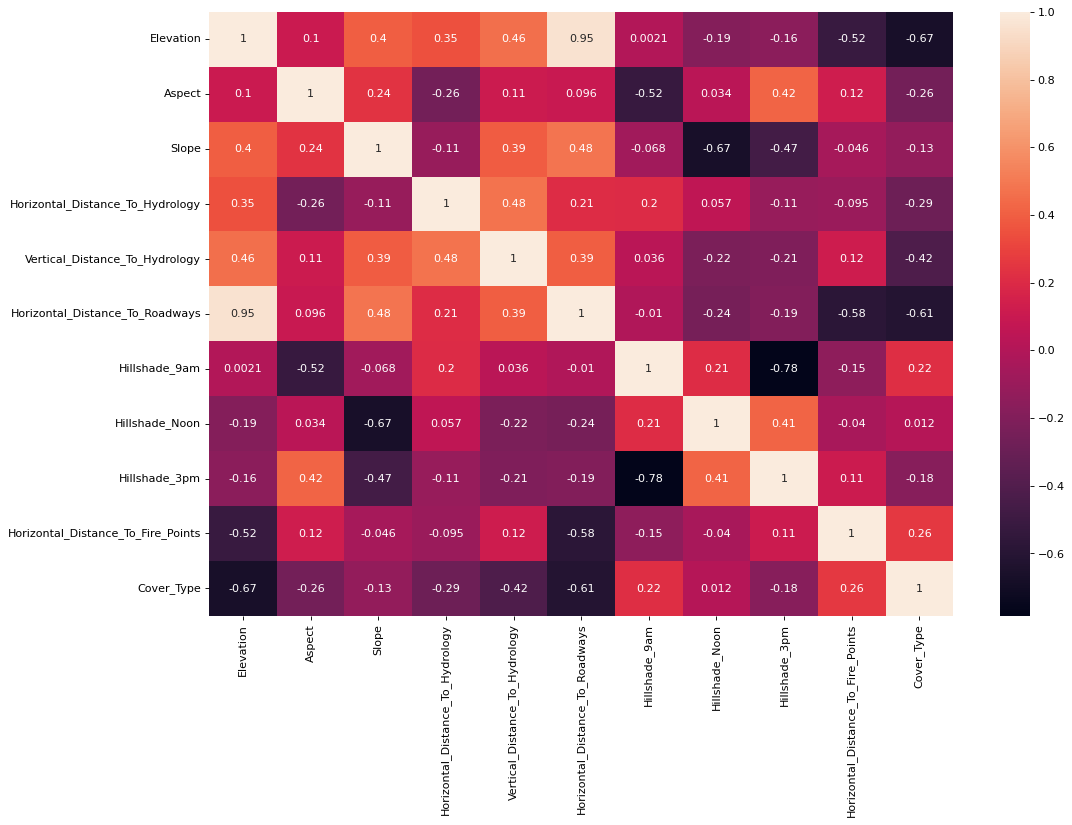

In [57]:
# dilakukan visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(15, 10), dpi=80)
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [154]:
# membuat fungsi untuk membuat 'array of column names'
def columnFunc(dataframe):
    list = []
    for i in df.columns:
        list.append(i)
    return list

In [155]:
# membuat fungsi untuk boxplot
def boxPlotFunc(row, col, figure_size, dpi, dataframes):
    plt.figure(figsize=figure_size, dpi=dpi)
    column_name = columnFunc(dataframes)
    for i in range(len(column_name)):
        plt.subplot(row, col, i+1)
        sns.boxplot(x='Cover_Type', y=column_name[i], data=dataframes)
        if i == (len(column_name)-2):
            break
        else:
            i += 1

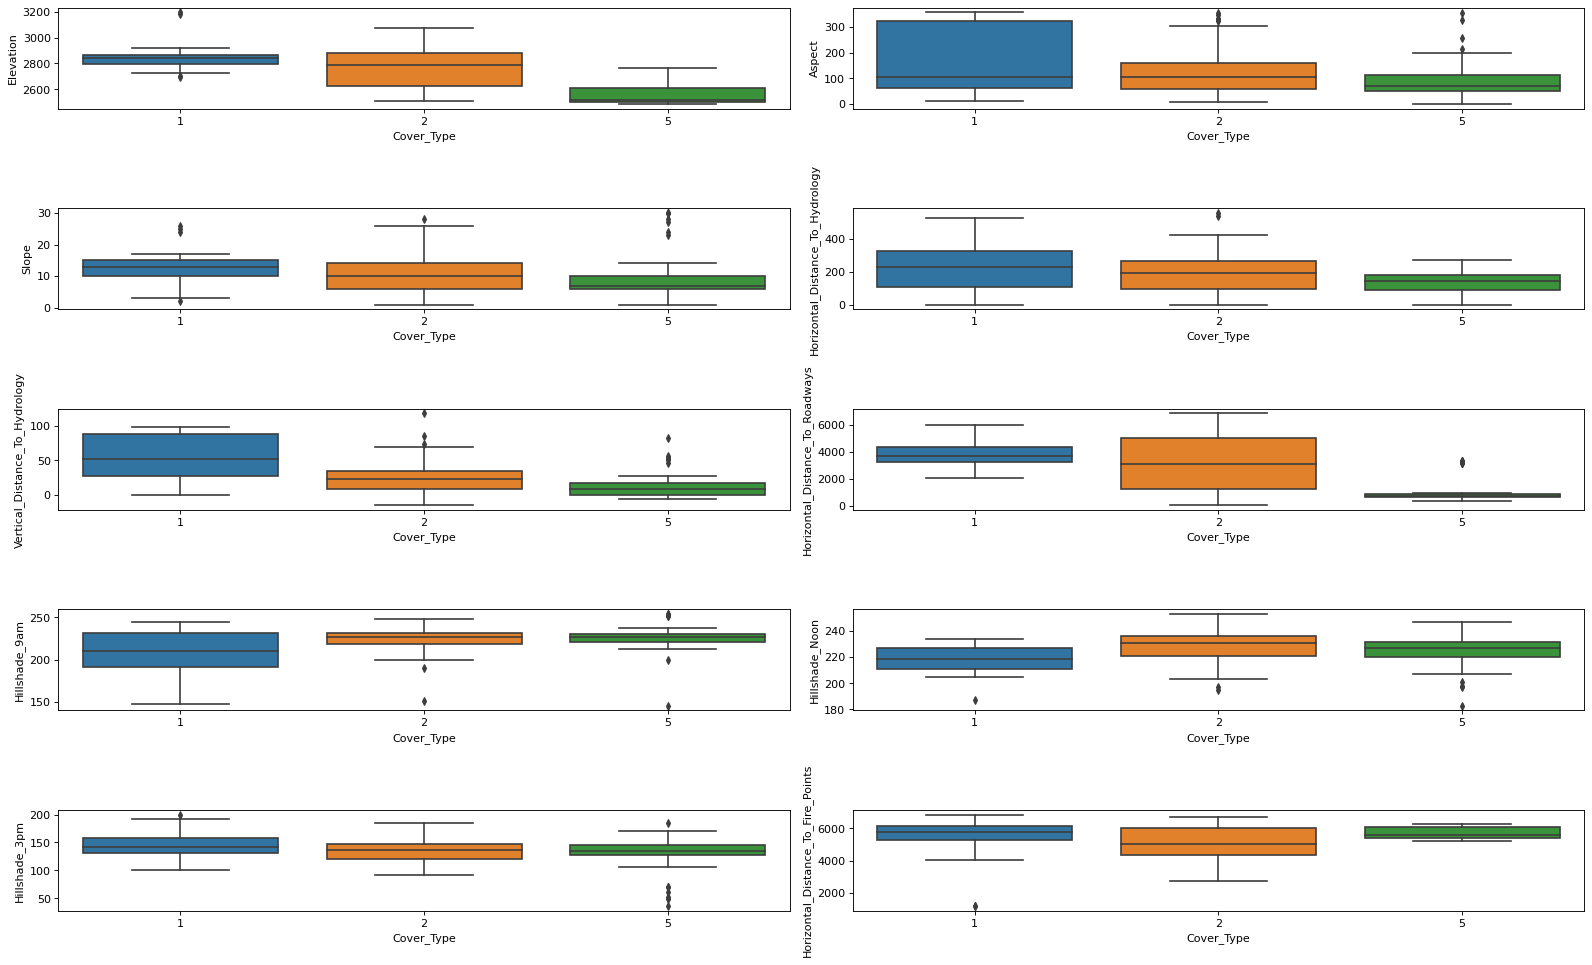

In [156]:
# visualisasi boxplot
boxPlotFunc(5, 2, (20, 12), 80, df)
plt.tight_layout(h_pad=6.0)

### 2. Membangun model

<p>Selanjutnya dilakukan definisi variabel X(kolom fitur) dan y(kolom label)</p>

In [164]:
# definisi array kolom fitur dan hapus kolom label
fitur = columnFunc(df)
fitur = np.delete(fitur, 10)

# definisi X dan y
X = df[fitur].values
y = df['Cover_Type'].values

In [165]:
# lakukan transformasi data label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

<p>Import library yang diperlukan untuk membangun model</p>

In [168]:
# import modul confusion matrix
from sklearn.metrics import confusion_matrix

# import modul akurasi, presisi, recall dan f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# import modul decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# imoprt modul untuk membagi dataset menjadi test dan train
from sklearn.model_selection import train_test_split

<p>Lakukan pembagian dataset dengan ukuran data latih dan ukuran data uji masing-masing 70% dan 30%</p>

In [169]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

<p>Metode Decision Tree digunakan untuk permasalahan karena relatif cocok untuk model klasifikasi</p>

In [170]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n', cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[ 4  0  0]
 [ 5  8  1]
 [ 2  0 17]]
accuracy_DecisionTree: 0.784
precision_DecisionTree: 0.784
recall_DecisionTree: 0.784
f1-score_DecisionTree : 0.784


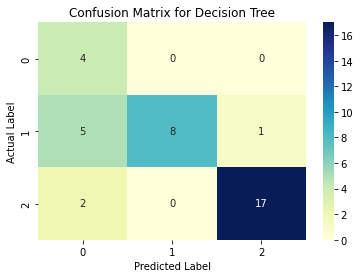

In [171]:
from sklearn import metrics
cdt = confusion_matrix(y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cdt), annot=True, cmap="YlGnBu" ,fmt='g').set_title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [181]:
cov_type = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

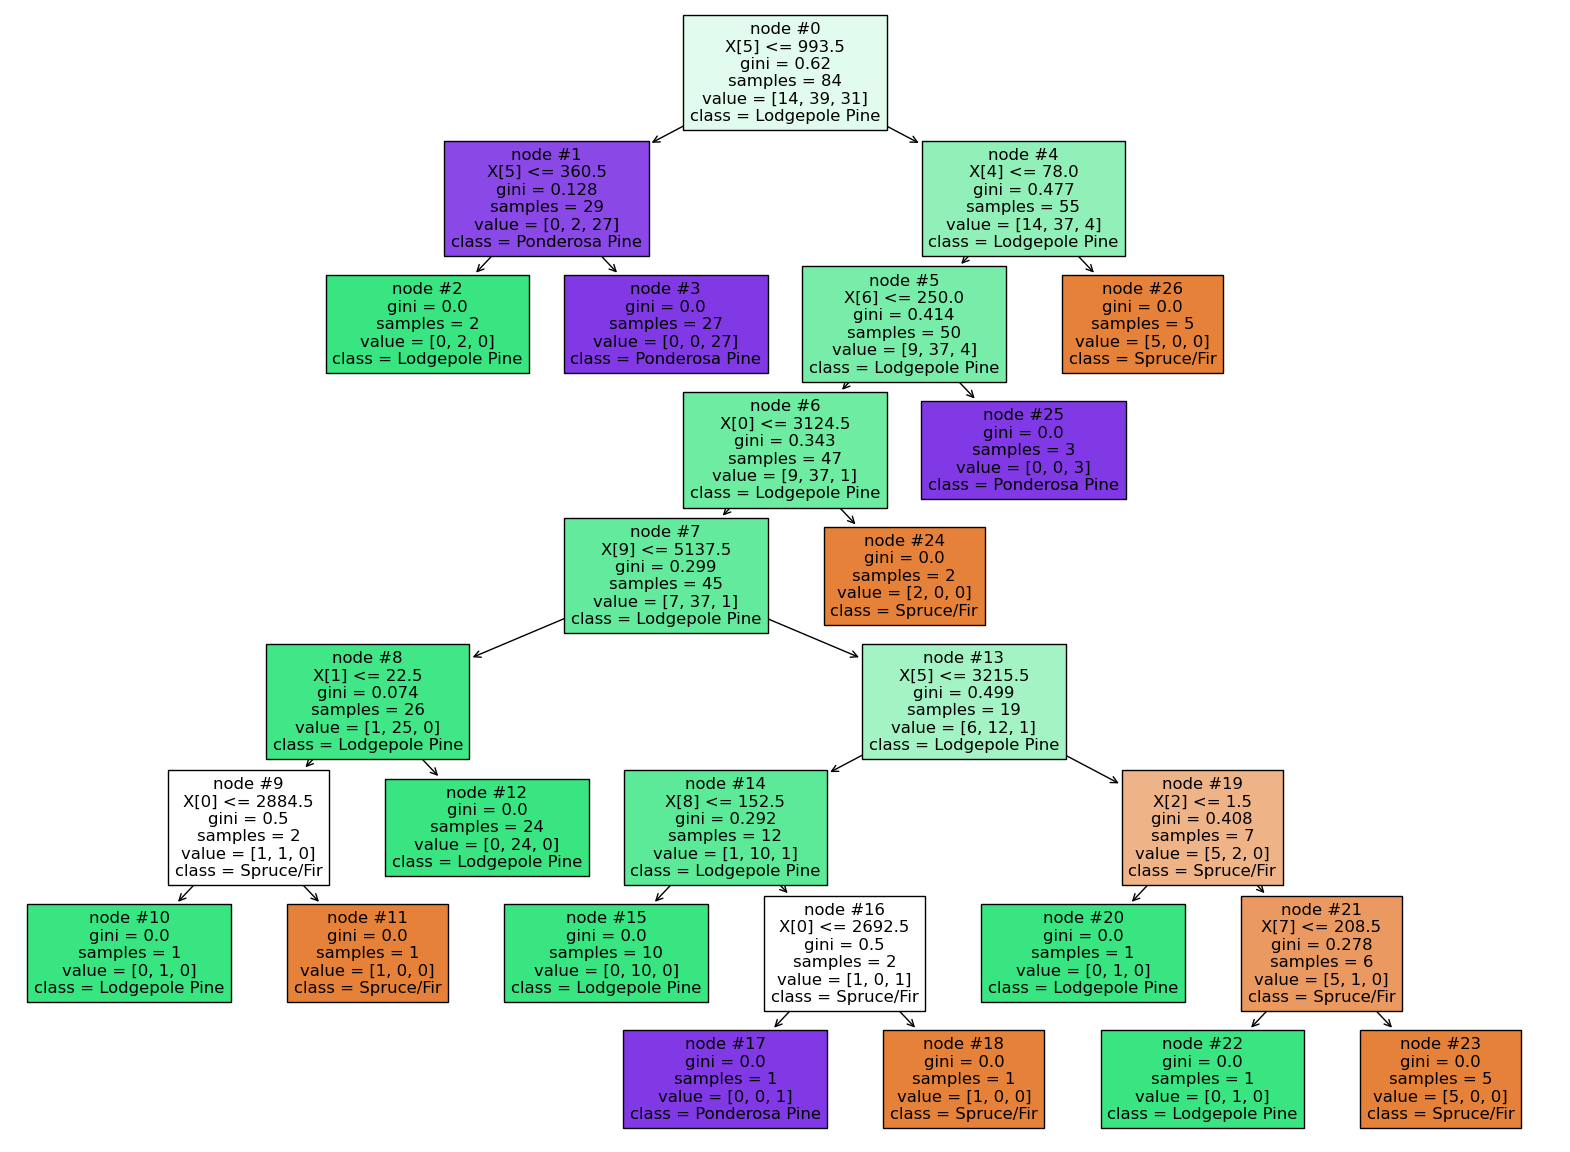

In [190]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 15), dpi=100)
plot_tree(decision_tree.fit(X_train, y_train), class_names=cov_type, filled=True, node_ids=True)
plt.show()

<p>Setelah dilakukan klasifikasi dengan metode Decision Tree, hanya didapatkan 3 klaster besar dari total 7 klaster, hal ini diperkirakan diakibatkan oleh :</p>

<ul>
    <li>Proses reduksi data dari 581010 data menjadi 120 data, terjadi reduksi hampir 99.8%</li>
    <li>Pembagian data latih dan uji yang kurang baik</li>
</ul>

<p>Selanjutnya kami akan mengujinya dengan metode Regression Tree dan atau memperbanyak jumlah baris data</p>